In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Iris%20(5).csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', nan],
      dtype=object)

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [ ]:
df[df['Species'].isnull()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,5.6,2.9,4.2,1.3,NaN
151,7.1,3.2,6.0,1.8,NaN
152,4.6,2.3,1.3,0.3,NaN
153,7.5,3.0,6.6,2.1,NaN
154,5.7,3.0,4.2,1.2,NaN
155,5.5,3.4,1.5,0.4,NaN
156,4.7,3.0,1.4,0.3,NaN
157,7.6,3.0,6.1,2.3,NaN


In [ ]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.001887,3.388679,1.460377,0.249057
Iris-versicolor,5.925000,2.776923,4.257692,1.323077
Iris-virginica,6.633962,2.979245,5.590566,2.028302


In [ ]:
# Replace the missing 'Species' of data 150 to 157 from your corresponding analysis

df.at[150, 'Species'] = 'Iris-versicolor'
df.at[151, 'Species'] = 'Iris-virginica'
df.at[152, 'Species'] = 'Iris-setosa'
df.at[153, 'Species'] = 'Iris-virginica'
df.at[154, 'Species'] = 'Iris-versicolor'
df.at[155, 'Species'] = 'Iris-setosa'
df.at[156, 'Species'] = 'Iris-setosa'
df.at[157, 'Species'] = 'Iris-virginica'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        158 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


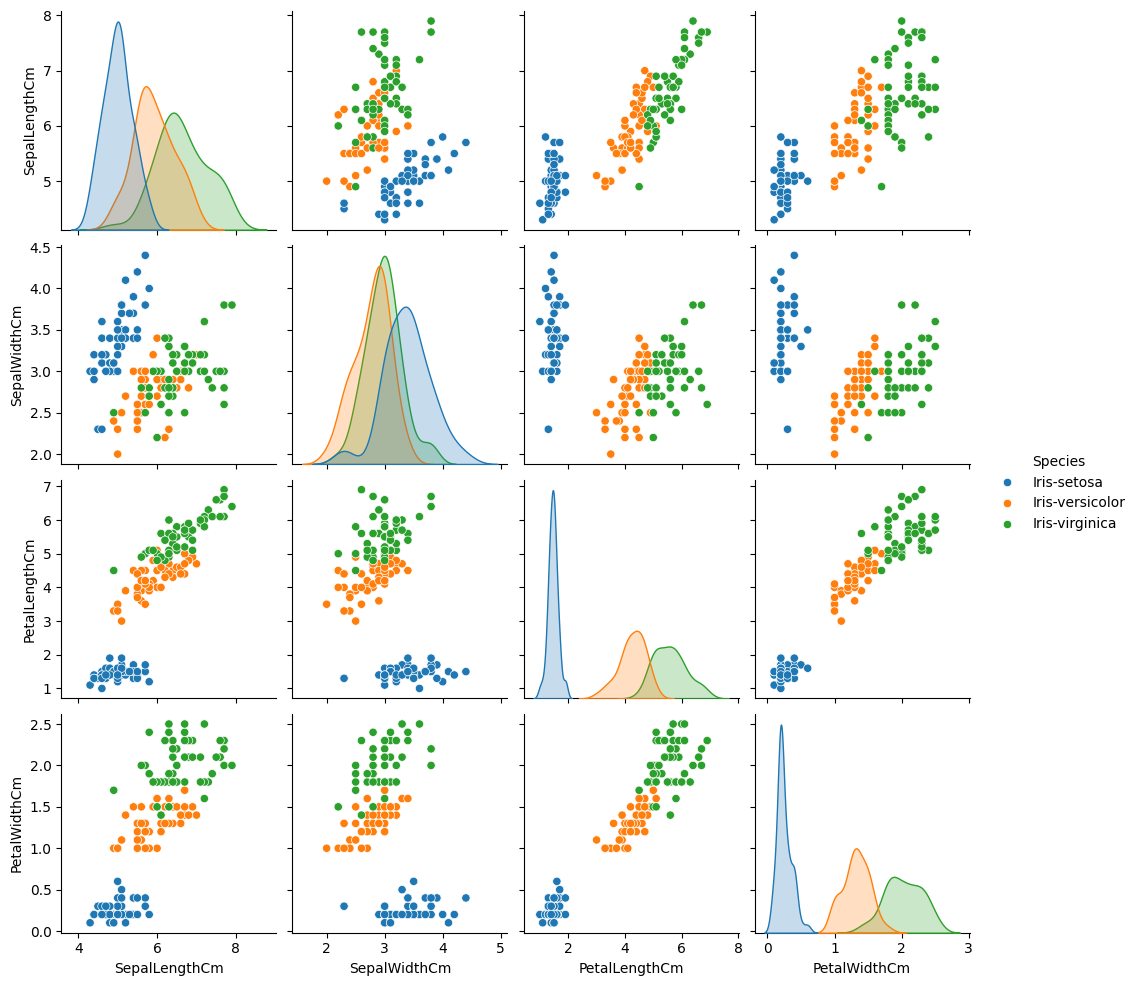

In [ ]:
sns.pairplot(df, hue = 'Species')

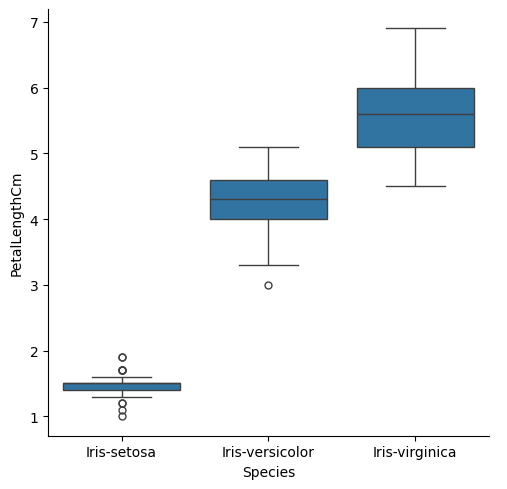

In [ ]:
sns.catplot(x = 'Species', y = 'PetalLengthCm', data = df, kind = 'box')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)


In [ ]:
#Import
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 50)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [ ]:
#prediction
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

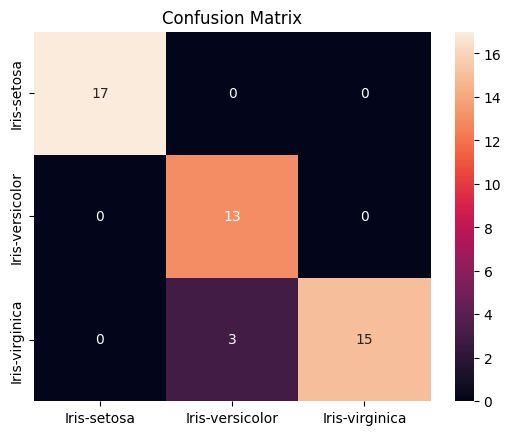

In [ ]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).set(title = 'Confusion Matrix')
plt.show()

In [ ]:
#Classification Report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.94        48
      macro avg       0.94      0.94      0.94        48
   weighted avg       0.95      0.94      0.94        48



In [ ]:
#Identify Feature Importance
pd.DataFrame(index = X.columns, columns = ['Feature Importance'], data = model.feature_importances_).sort_values('Feature Importance', ascending = False)

,Feature Importance
PetalWidthCm,0.543613
PetalLengthCm,0.435911
SepalLengthCm,0.020477
SepalWidthCm,0.000000


Plots

In [ ]:
from sklearn import tree

text_representation = tree.export_text(model, feature_names = X.columns.tolist())
print(text_representation)

|--- PetalWidthCm <= 0.80
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.80
|   |--- PetalLengthCm <= 4.85
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- PetalLengthCm <= 4.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalLengthCm >  4.65
|   |   |   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.85
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 5.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  5.05
|   |   |   |   |--- SepalLengthCm <= 6.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- SepalLengthCm >  6.05
|   |   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- class: Iris-virginica



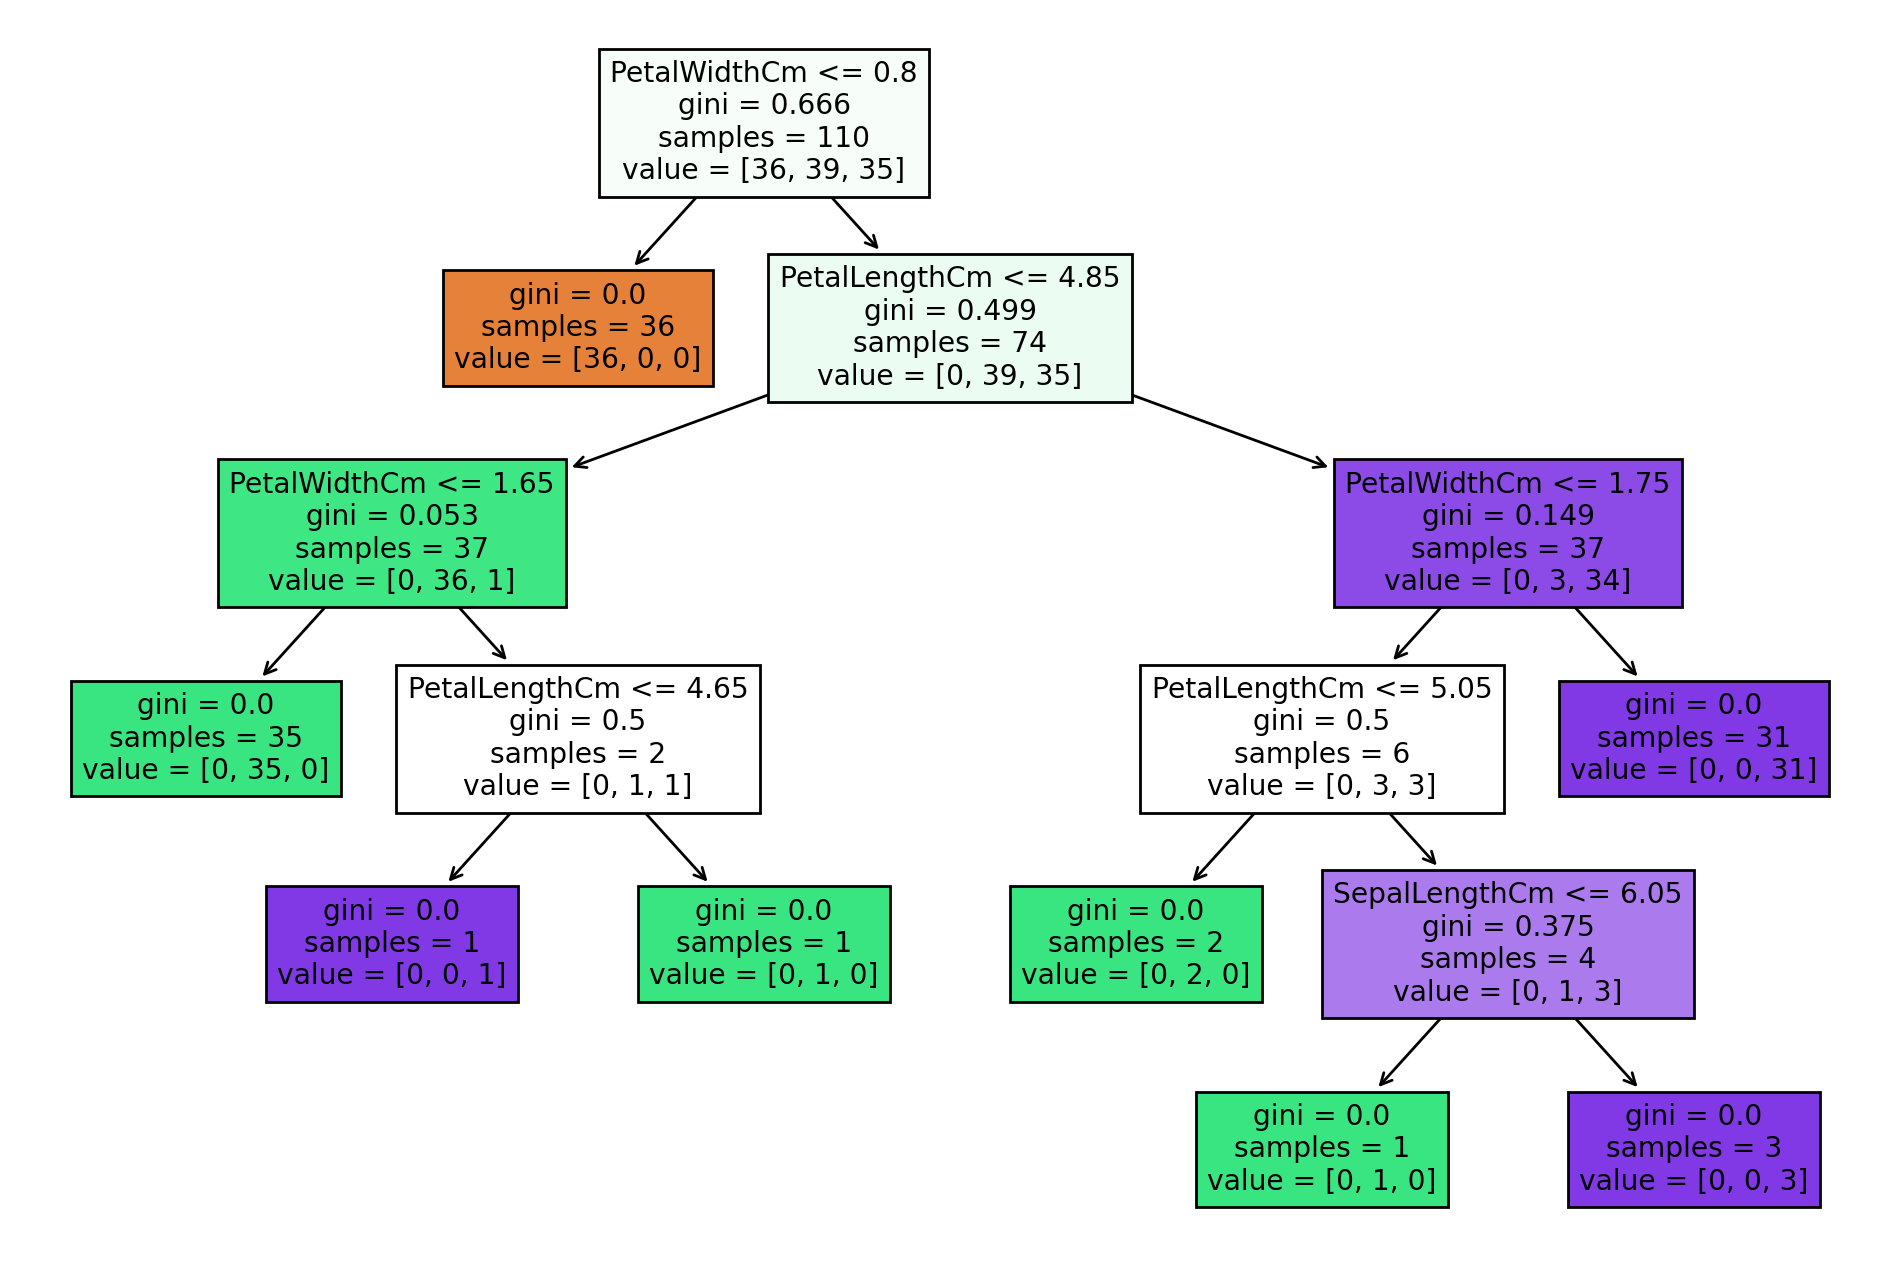

In [ ]:
#Do a graphical representation of Decision Tree with Default values
from sklearn.tree import plot_tree

plt.figure(figsize = (12,8), dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True);

Alternate Version of Graphical Plot

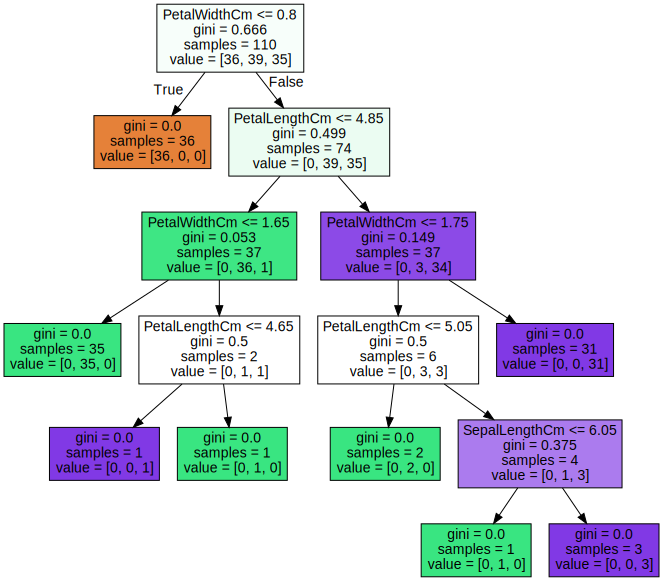

In [ ]:
import graphviz

#DOT Data

dot_data = tree.export_graphviz(model, feature_names = X.columns, filled = True)

#Draw graph

graph = graphviz.Source(dot_data, format = "png")
graph

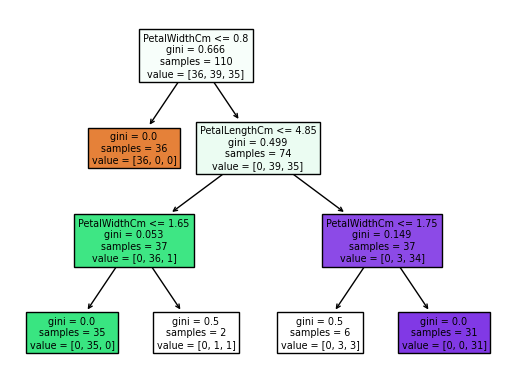

In [ ]:
#Can you show me another version of the decision tree with max_depth of only 3, random_state = 50?
pruned_tree = DecisionTreeClassifier(max_depth = 3, random_state = 50)
pruned_tree.fit(X_train, y_train)
plot_tree(pruned_tree, feature_names = X.columns, filled = True);

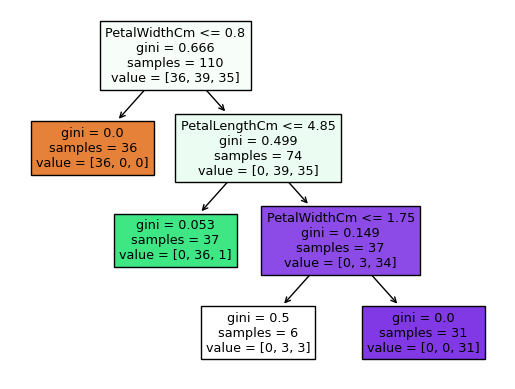

In [ ]:
#How about maximum leaf nodes of 4, random_state = 50?
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 50)
max_leaf_tree.fit(X_train, y_train)
plot_tree(max_leaf_tree, feature_names = X.columns, filled = True);

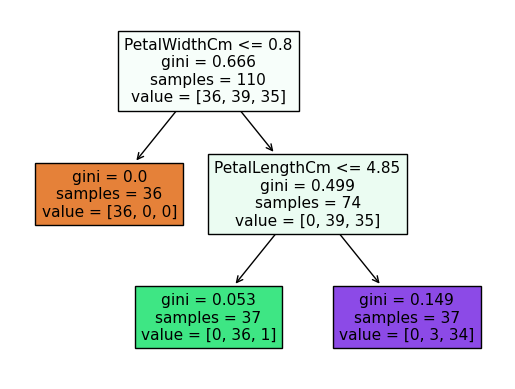

In [ ]:
#How about max_depth 0f 4 and maximum leaf nodes of 3, random_state = 50?
max_leaf_depth_tree = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 3, random_state = 50)
max_leaf_depth_tree.fit(X_train, y_train)
plot_tree(max_leaf_depth_tree, feature_names = X.columns, filled = True);